In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

- mu_15: 15분당 평균 대여 자전거 수
- lambda_15: 15분당 평균 반납 자전거 수
- L_s : 대여소 내 평균 자전거 수
- W_s : 대여소 내 평균 대기시간(자전거 반납 후 재대여 될 때까지의 시간)

In [2]:
df = pd.read_excel('./data/6월 대여소별 Ls, Lq, Ws, Wq.xlsx')
df

,자치구,대여소명,시간,lambda_15,mu_15,rho,p_c,L_s,L_q,W_s,W_q
0,중랑구,(구)신한은행 중랑교지점,0,0.950000,0.675000,1.407407,0.299289,6.884520,5.898333,10.342152,8.860671
1,중랑구,(구)신한은행 중랑교지점,1,0.925000,0.533333,1.734375,0.425150,7.679068,6.682062,14.441490,12.566490
2,중랑구,(구)신한은행 중랑교지점,2,0.533333,0.316667,1.684211,0.408474,7.593215,6.596961,24.068740,20.910845
3,중랑구,(구)신한은행 중랑교지점,3,0.391667,0.208333,1.880000,0.468935,7.881800,6.883399,37.893211,33.093211
4,중랑구,(구)신한은행 중랑교지점,4,0.333333,0.133333,2.500000,0.600063,8.334382,7.334539,62.517699,55.017699
...,...,...,...,...,...,...,...,...,...,...,...
48635,강서구,힐스테이트에코,20,1.100000,1.383333,0.795181,0.037509,2.571731,1.806377,2.429049,1.706158
48636,강서구,힐스테이트에코,21,1.008333,0.833333,1.210000,0.211614,5.211815,4.257869,6.556110,5.356110
48637,강서구,힐스테이트에코,22,0.666667,0.883333,0.754717,0.028047,2.300231,1.566681,3.549911,2.417836
48638,강서구,힐스테이트에코,23,0.558333,0.508333,1.098361,0.157062,4.618060,3.692210,9.812290,7.845077


In [3]:
df = df.drop(['p_c', 'L_q', 'W_q'], axis = 1)
df.head()

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s
0,중랑구,(구)신한은행 중랑교지점,0,0.950000,0.675000,1.407407,6.884520,10.342152
1,중랑구,(구)신한은행 중랑교지점,1,0.925000,0.533333,1.734375,7.679068,14.441490
2,중랑구,(구)신한은행 중랑교지점,2,0.533333,0.316667,1.684211,7.593215,24.068740
3,중랑구,(구)신한은행 중랑교지점,3,0.391667,0.208333,1.880000,7.881800,37.893211
4,중랑구,(구)신한은행 중랑교지점,4,0.333333,0.133333,2.500000,8.334382,62.517699


# 자치구별(시간 제외)

In [4]:
dft_pivot_lambda = df.pivot_table(index = ['자치구'], values = ['lambda_15']).T
dft_pivot_lambda.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
lambda_15,0.256768,0.482085,0.353044,0.660462,0.532723,0.640009,0.445296,0.295112,0.632854,0.374264,0.493656,0.401633,0.63535,0.325555,0.295689,0.527007,0.395866,0.573176,0.477156,0.729206,0.3422,0.369559,0.30657,0.271647,0.405697


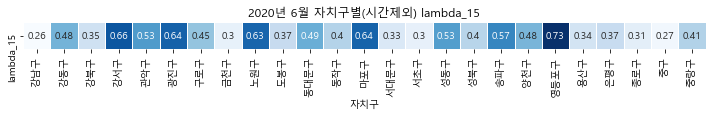

In [5]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월 자치구별(시간제외) lambda_15')
plt.tight_layout()
plt.show()

In [6]:
dft_pivot_lambda_std = df.pivot_table(index = ['자치구'], values = ['lambda_15'], aggfunc = 'std').T
dft_pivot_lambda_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
lambda_15,0.336015,0.602867,0.420217,0.850415,0.898189,1.169488,0.673859,0.462195,0.662779,0.459106,0.510555,0.60733,0.888885,0.492909,0.589652,0.820758,0.525583,0.675612,0.582313,1.072679,0.50095,0.621781,0.384809,0.326832,0.532833


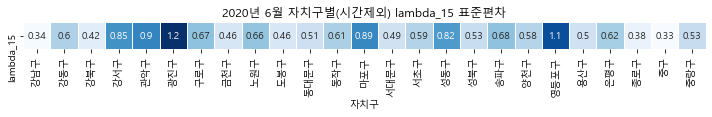

In [7]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월 자치구별(시간제외) lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [8]:
dft_pivot_mu = df.pivot_table(index = ['자치구'], values = ['mu_15']).T
dft_pivot_mu.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
mu_15,0.269337,0.467461,0.352133,0.651503,0.534581,0.639918,0.440657,0.297613,0.63176,0.363472,0.487465,0.398896,0.638726,0.336442,0.303942,0.52051,0.398644,0.570285,0.469815,0.73217,0.342211,0.354176,0.332709,0.286992,0.388636


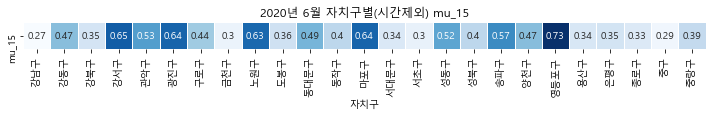

In [9]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월 자치구별(시간제외) mu_15')
plt.tight_layout()
plt.show()

In [10]:
dft_pivot_mu_std = df.pivot_table(index = ['자치구'], values = ['mu_15'], aggfunc = 'std').T
dft_pivot_mu_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
mu_15,0.352901,0.564833,0.408104,0.825519,0.873751,1.094595,0.674606,0.450865,0.65423,0.433196,0.487146,0.552464,0.858725,0.453705,0.572747,0.771756,0.485988,0.672432,0.549956,1.056528,0.485026,0.530582,0.427362,0.357853,0.476335


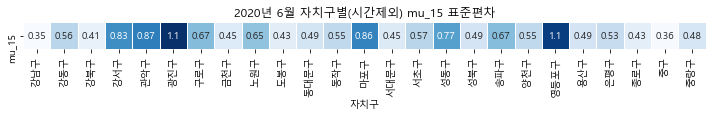

In [11]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월 자치구별(시간제외) mu_15 표준편차')
plt.tight_layout()
plt.show()

In [12]:
dft_pivot_rho = df.pivot_table(index = ['자치구'], values = ['rho']).T
dft_pivot_rho.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
rho,1.065658,1.200764,1.080251,1.227626,1.07225,1.041387,1.196165,1.43032,1.122431,1.225033,1.17534,1.01887,1.18527,0.997338,1.011488,1.149808,1.05239,1.125999,1.13075,1.218644,1.093286,1.062764,1.013534,1.092942,1.083611


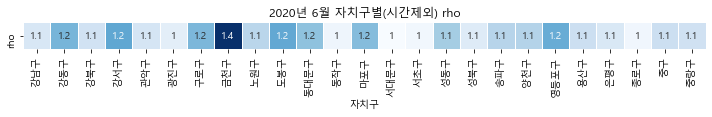

In [13]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월 자치구별(시간제외) rho')
plt.tight_layout()
plt.show()

In [14]:
dft_pivot_L_s = df.pivot_table(index = ['자치구'], values = ['L_s']).T
dft_pivot_L_s.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
L_s,1.093418,2.483693,1.721133,3.475049,2.959122,3.610671,2.237372,1.282584,3.10718,1.865065,2.453364,2.074819,3.37869,1.520669,1.492455,2.754816,2.016482,3.045206,2.495929,3.972023,1.776665,2.001824,1.492556,1.29935,2.201772


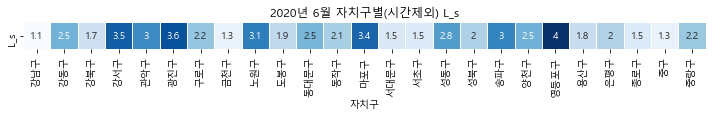

In [15]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월 자치구별(시간제외) L_s')
plt.tight_layout()
plt.show()

In [16]:
dft_pivot_L_s_std = df.pivot_table(index = ['자치구'], values = ['L_s'], aggfunc = 'std').T
dft_pivot_L_s_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
L_s,1.590102,2.954581,2.043847,4.185082,5.50523,7.302649,3.242417,1.738506,3.108152,2.225501,2.245398,3.18412,4.742587,2.44119,3.202375,4.100868,2.698285,3.477707,2.887102,5.901075,2.542286,3.492923,1.704048,1.37543,2.8657


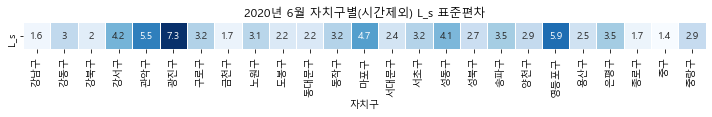

In [17]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월 자치구별(시간제외) L_s 표준편차')
plt.tight_layout()
plt.show()

In [18]:
dft_pivot_W_s = df.pivot_table(index = ['자치구'], values = ['W_s']).T
dft_pivot_W_s.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
W_s,9.934783,13.236271,10.678334,14.214338,9.965826,12.47271,12.750478,16.172487,12.627589,12.682562,13.026202,10.631702,18.273175,8.3051,11.032097,14.017755,9.523323,15.182848,14.999959,18.973877,12.735914,11.234394,17.899334,18.881619,9.102021


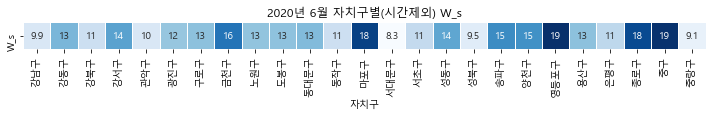

In [19]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월 자치구별(시간제외) W_s')
plt.tight_layout()
plt.show()

In [20]:
dft_pivot_W_s_std = df.pivot_table(index = ['자치구'], values = ['W_s'], aggfunc = 'std').T
dft_pivot_W_s_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
W_s,23.537532,27.496023,17.249737,33.181433,15.686062,29.70428,34.129048,36.940373,30.827536,33.043162,27.271139,38.800555,75.785845,18.759035,35.330004,40.445884,18.517418,39.474989,46.855942,47.044287,31.541746,24.801853,62.022931,62.304525,18.324279


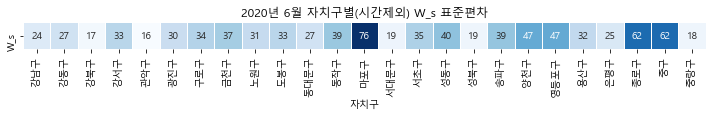

In [21]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월 자치구별(시간제외) W_s 표준편차')
plt.tight_layout()
plt.show()

# 자치구별 시간별

In [22]:
df_pivot_lambda = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['lambda_15'])
df_pivot_lambda.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.172949  0.167949  0.136040  0.097507  0.061681  0.042593  0.086396   
강동구  0.398554  0.339634  0.260802  0.169342  0.107407  0.102675  0.165947   
강북구  0.366276  0.375309  0.300481  0.213301  0.140545  0.090545  0.098397   
강서구  0.467430  0.377371  0.263750  0.173819  0.119514  0.107708  0.203403   
관악구  0.561218  0.499487  0.340608  0.245503  0.161376  0.123413  0.143519   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.236538  0.417023  0.309402  0.202137  0.197293  0.238462  0.233974   
강동구  0.345473  0.583025  0.350813  0.278086  0.309774  0.364300  0.416872   
강북구  0.169071  0.310096  0.216026  0.199679  0.196795  0.240224  0.266827   
강서구  0.509444  1.036667  0.561319  0.401875  0.445069  0.537222  0.581458   
관악구  0.264286  0.503571  0.328175  0.255688  0.277381  0.355423  0.386772   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.228419  0.255698  0.309259  0.436610  0.538675  0.433903  0.403989   
강동구  0.402984  0.462037  0.527572  0.731584  1.013786  0.965844  0.876543   
강북구  0.301603  0.346314  0.400481  0.504327  0.668750  0.651442  0.636058   
강서구  0.581181  0.637431  0.785903  1.082431  1.559931  1.368750  1.192708   
관악구  0.398942  0.445503  0.558598  0.737169  1.111111  1.108069  1.029365   

                                   
시간         21        22        23  
자치구                                
강남구  0.367379  0.343803  0.254060  
강동구  0.902366  0.873765  0.641770  
강북구  0.630449  0.634135  0.512019  
강서구  1.116875  1.012639  0.769653  
관악구  1.050000  1.032804  0.861640

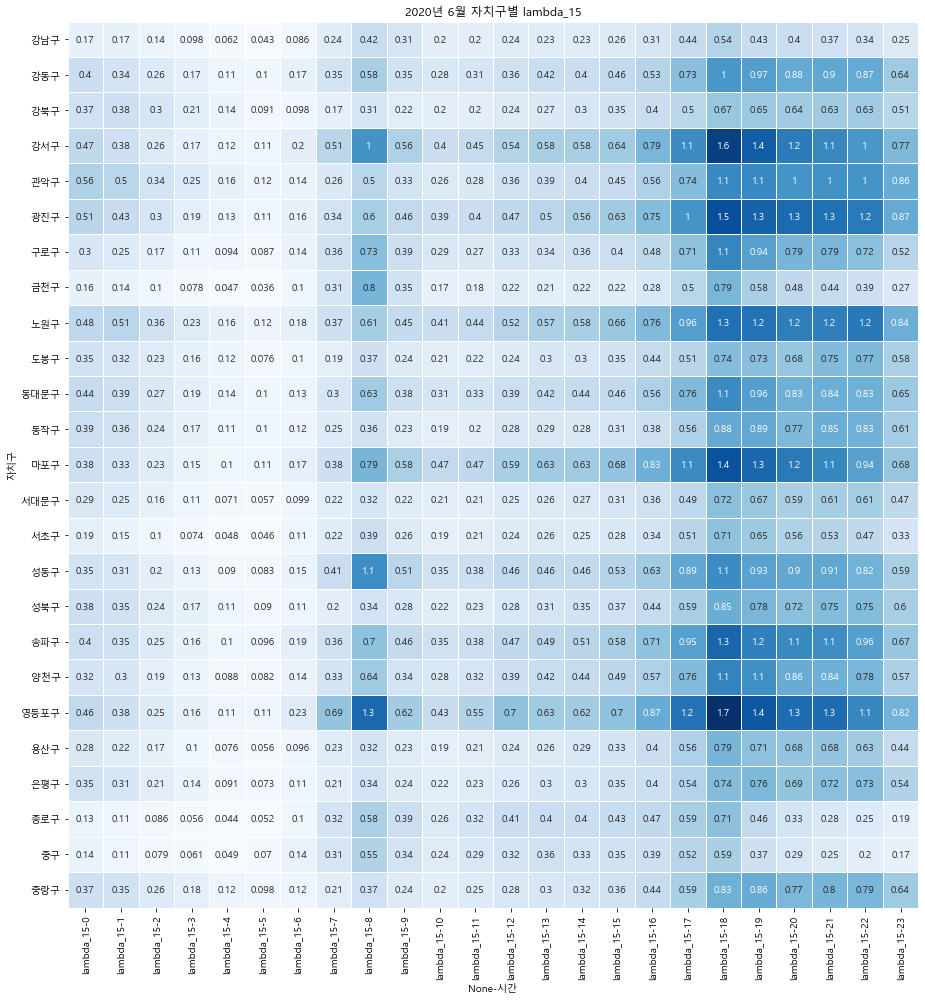

In [23]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월 자치구별 lambda_15')
plt.tight_layout()
plt.show()

In [24]:
df_pivot_lambda_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['lambda_15'], aggfunc = 'std')
df_pivot_lambda_std.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.202783  0.158977  0.141018  0.121262  0.079923  0.066332  0.128344   
강동구  0.451698  0.349050  0.260506  0.186836  0.113491  0.103438  0.187070   
강북구  0.395144  0.379751  0.293709  0.231619  0.142104  0.105125  0.168342   
강서구  0.486615  0.359147  0.250293  0.166187  0.115730  0.114853  0.330853   
관악구  0.766625  0.597143  0.392807  0.267902  0.190937  0.164113  0.179221   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.343364  0.543548  0.367170  0.191458  0.174726  0.211388  0.209177   
강동구  0.467336  0.781977  0.406777  0.294650  0.291865  0.355581  0.416600   
강북구  0.243272  0.371981  0.301390  0.230910  0.206196  0.232747  0.276279   
강서구  0.753966  1.387148  0.686572  0.431039  0.459430  0.487047  0.558912   
관악구  0.451715  0.771731  0.437530  0.297340  0.313751  0.393240  0.447002   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.200917  0.239073  0.287709  0.397910  0.537385  0.464475  0.493295   
강동구  0.413472  0.490817  0.512560  0.682249  0.927242  0.890895  0.769315   
강북구  0.291431  0.342510  0.400987  0.480713  0.581432  0.591117  0.571111   
강서구  0.543189  0.586921  0.749203  1.074160  1.435548  1.204809  1.097707   
관악구  0.511968  0.529835  0.715464  0.967227  1.418186  1.506317  1.459535   

                                   
시간         21        22        23  
자치구                                
강남구  0.426225  0.391332  0.300637  
강동구  0.828218  0.822143  0.589745  
강북구  0.569657  0.593683  0.454176  
강서구  1.013217  0.885007  0.640503  
관악구  1.556579  1.515309  1.129793

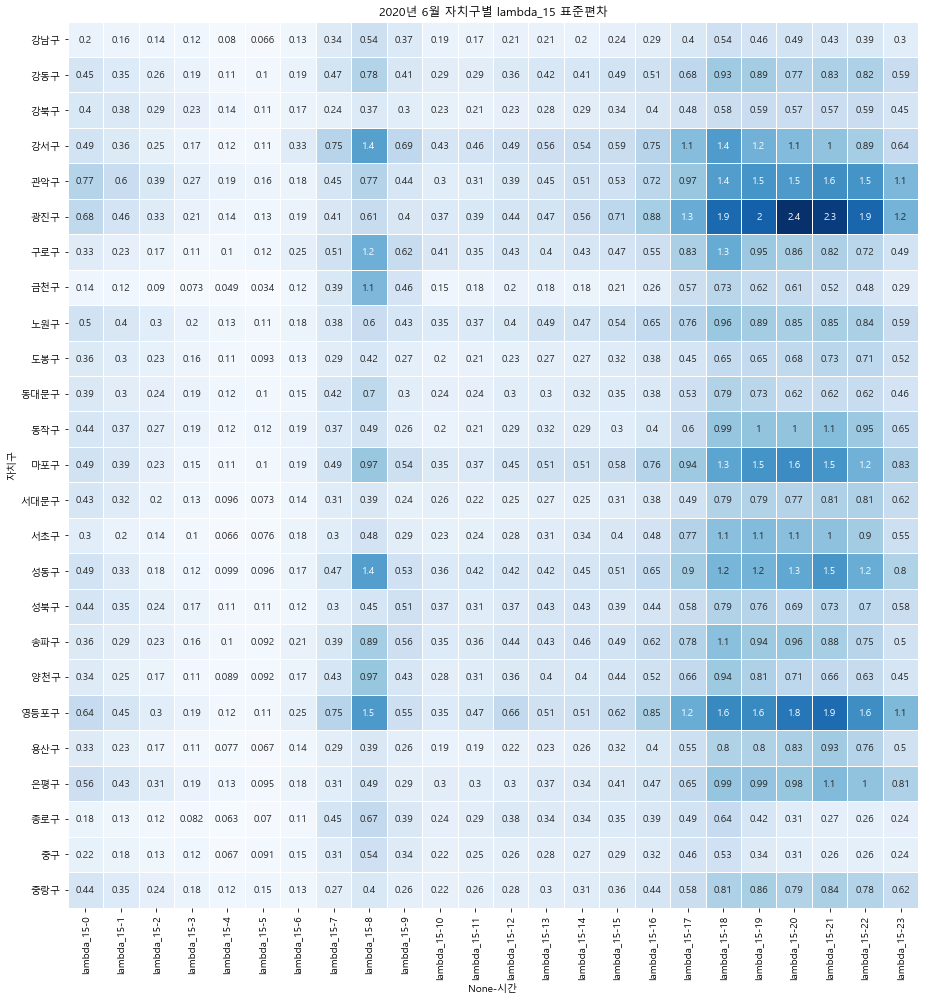

In [25]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월 자치구별 lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [26]:
df_pivot_mu = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['mu_15'])
df_pivot_mu.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.151538  0.160185  0.128704  0.095513  0.053490  0.055342  0.105057   
강동구  0.333844  0.294715  0.199691  0.136214  0.090432  0.112346  0.228704   
강북구  0.330729  0.323920  0.256410  0.170192  0.122276  0.080769  0.105449   
강서구  0.372653  0.300203  0.206667  0.144444  0.098542  0.121528  0.244306   
관악구  0.441667  0.372821  0.283201  0.203571  0.137037  0.130952  0.182011   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.217877  0.329915  0.247578  0.186681  0.212179  0.244017  0.234188   
강동구  0.476955  0.617901  0.377846  0.309774  0.329218  0.386728  0.415329   
강북구  0.220353  0.309455  0.248558  0.203686  0.206250  0.260737  0.303365   
강서구  0.626667  1.019236  0.533611  0.424653  0.492292  0.559236  0.589097   
관악구  0.447090  0.691534  0.364683  0.315608  0.331217  0.409524  0.412566   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.270798  0.313604  0.423219  0.680484  0.682692  0.460826  0.411610   
강동구  0.421605  0.489095  0.591049  0.797737  0.991461  0.860391  0.861111   
강북구  0.332853  0.375962  0.450481  0.538782  0.706571  0.637660  0.651923   
강서구  0.606875  0.676736  0.873889  1.221250  1.634028  1.296944  1.175625   
관악구  0.444841  0.503175  0.595635  0.804630  1.088624  1.058598  1.098413   

                                   
시간         21        22        23  
자치구                                
강남구  0.344729  0.276852  0.190100  
강동구  0.782922  0.668519  0.476749  
강북구  0.614103  0.544391  0.462340  
강서구  1.021181  0.843819  0.612500  
관악구  0.997619  0.865079  0.677116

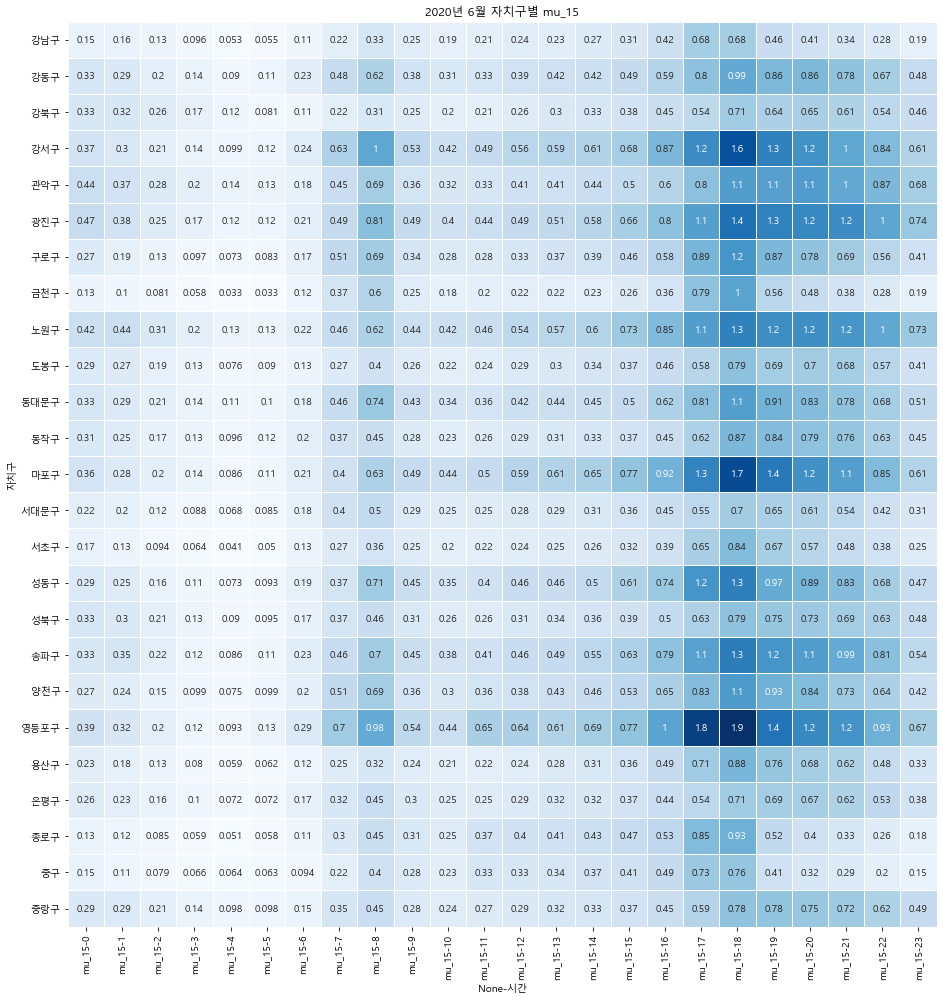

In [27]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월 자치구별 mu_15')
plt.tight_layout()
plt.show()

In [28]:
df_pivot_mu_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['mu_15'], aggfunc = 'std')
df_pivot_mu_std.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.166265  0.147306  0.133457  0.101051  0.062296  0.072139  0.112641   
강동구  0.421776  0.318471  0.222495  0.170783  0.106059  0.110004  0.227707   
강북구  0.357488  0.356006  0.265877  0.205456  0.141794  0.085980  0.104434   
강서구  0.404892  0.295807  0.209755  0.170181  0.111530  0.128481  0.249123   
관악구  0.690110  0.472940  0.342291  0.293518  0.169900  0.155798  0.235023   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.228609  0.338822  0.216973  0.146217  0.168323  0.198307  0.194323   
강동구  0.409804  0.601892  0.374601  0.273166  0.300483  0.386596  0.399727   
강북구  0.182957  0.257772  0.206054  0.167907  0.170885  0.210213  0.259405   
강서구  0.582419  1.086437  0.502967  0.332875  0.401566  0.451737  0.500712   
관악구  0.598380  0.842944  0.412760  0.362286  0.351523  0.441161  0.440808   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.223480  0.277079  0.380164  0.722606  0.620764  0.490022  0.446643   
강동구  0.397011  0.481400  0.567788  0.781451  0.946998  0.810039  0.737252   
강북구  0.273630  0.320219  0.419053  0.504778  0.680128  0.610753  0.589816   
강서구  0.535363  0.574904  0.758350  1.235544  1.572754  1.215952  1.101152   
관악구  0.501381  0.595336  0.707232  0.955696  1.316040  1.441999  1.550616   

                                   
시간         21        22        23  
자치구                                
강남구  0.402625  0.317186  0.218622  
강동구  0.764072  0.679747  0.478303  
강북구  0.586682  0.514873  0.418247  
강서구  0.972624  0.785094  0.575670  
관악구  1.508954  1.411803  1.045179

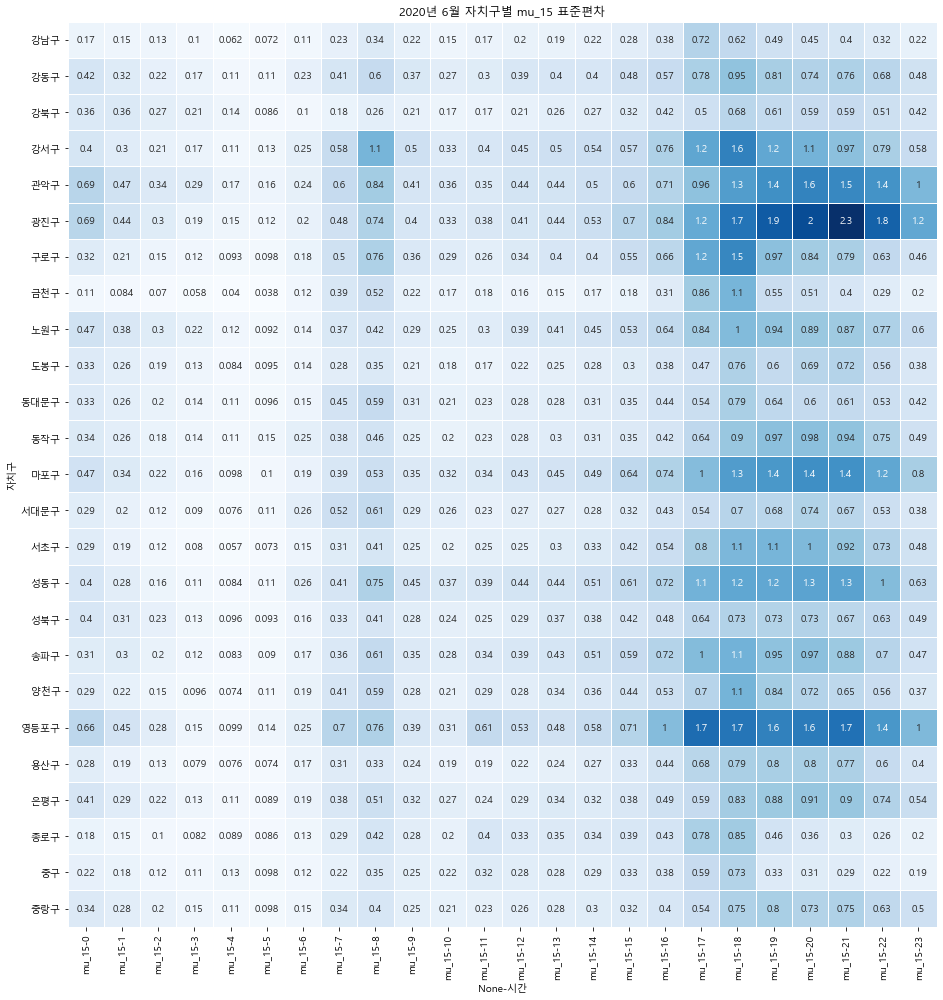

In [29]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월 자치구별 mu_15 표준편차')
plt.tight_layout()
plt.show()

In [30]:
df_pivot_rho = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['rho'])
df_pivot_rho.head()

rho                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  1.068169  1.166147  1.277104  0.955264  1.168675  0.905112  1.095704   
강동구  1.196779  1.337065  1.592499  1.507420  1.532570  1.409996  1.657288   
강북구  0.989435  1.205844  1.219128  1.342922  1.717057  1.410041  1.023151   
강서구  1.179828  1.358925  1.512614  1.648272  1.475104  1.274527  1.337370   
관악구  1.276346  1.488860  1.347407  1.503555  1.446493  0.962644  0.939901   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  1.457076  1.567305  1.457543  1.048466  0.878011  0.981378  0.977311   
강동구  1.029987  1.048917  0.942991  0.936931  0.963350  1.032560  1.000168   
강북구  0.682232  1.100132  0.977665  1.155973  0.976563  0.968849  0.890833   
강서구  1.728132  2.028683  1.365264  0.939342  0.878408  0.929496  0.964278   
관악구  0.874391  1.052407  1.155769  0.887939  0.808867  0.902131  0.914985   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.845296  0.841188  0.738630  0.765710  0.847635  0.916937  0.870582   
강동구  1.007829  0.955380  0.898677  0.970602  1.149847  1.245240  1.029261   
강북구  0.964429  0.923364  0.961170  0.927546  1.152045  1.010260  0.997075   
강서구  0.933148  0.919029  0.876408  0.979349  1.022501  1.026248  1.065596   
관악구  0.820311  0.908183  0.874402  0.866148  1.019072  1.047854  0.873046   

                                   
시간         21        22        23  
자치구                                
강남구  1.042684  1.275727  1.427858  
강동구  1.285235  1.521514  1.568574  
강북구  1.074054  1.140891  1.131489  
강서구  1.232860  1.339917  1.453210  
관악구  1.117891  1.249459  1.334127

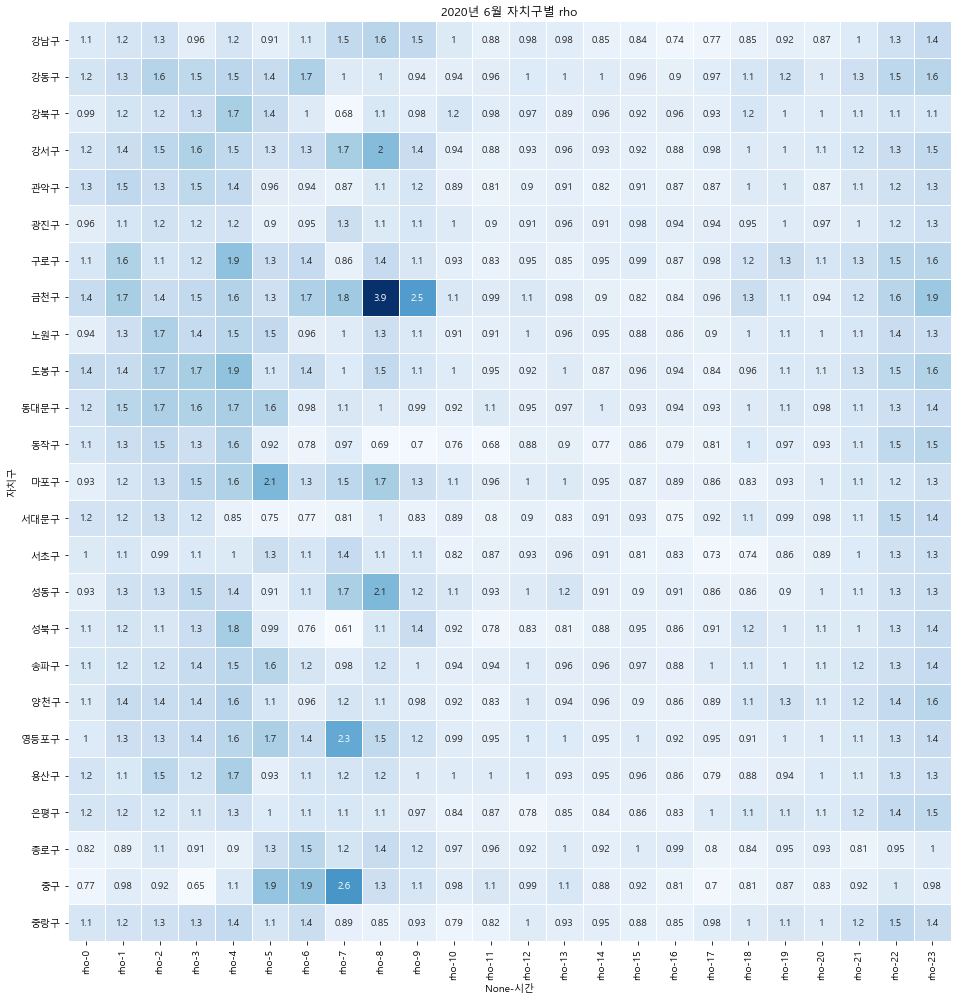

In [31]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월 자치구별 rho')
plt.tight_layout()
plt.show()

In [32]:
df_pivot_L_s = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['L_s'])
df_pivot_L_s.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  1.159605  1.093995  1.163352  1.196250  1.229732  0.878223  0.958239   
강동구  2.449933  2.925184  3.197896  2.889854  2.890733  2.188028  1.989756   
강북구  1.568201  1.971515  2.067388  2.135650  1.862524  1.755812  1.544183   
강서구  3.633180  4.196498  4.182024  4.183095  3.725131  2.885773  2.845013   
관악구  3.168486  4.434095  3.343047  3.690299  3.574059  2.723062  2.654231   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  1.131111  1.250055  1.215643  1.217251  1.091249  1.121125  1.149532   
강동구  1.660960  1.915130  2.155886  2.075884  2.203491  2.177423  2.586912   
강북구  1.202483  1.677958  1.477653  1.748230  1.831644  1.721961  1.538015   
강서구  2.621845  2.498533  2.979528  3.092618  3.089276  3.198279  3.476194   
관악구  2.263403  2.110649  2.472344  1.794843  2.400342  2.314966  2.784007   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.936482  0.907303  0.833929  0.786387  0.927372  1.028071  1.141473   
강동구  2.354323  2.311804  2.116790  2.374294  2.516978  2.763577  2.542494   
강북구  1.591473  1.643908  1.563889  1.677902  1.593279  1.806946  1.669971   
강서구  3.321644  3.361459  3.279513  3.640490  3.465222  3.737648  3.626625   
관악구  2.704243  2.286434  3.019493  2.829734  3.387473  3.369721  2.502517   

                                   
시간         21        22        23  
자치구                                
강남구  1.146458  1.290246  1.381591  
강동구  2.880863  3.164578  3.281554  
강북구  1.734254  2.032352  1.915667  
강서구  3.933457  4.161908  4.219190  
관악구  3.374496  3.850993  3.869317

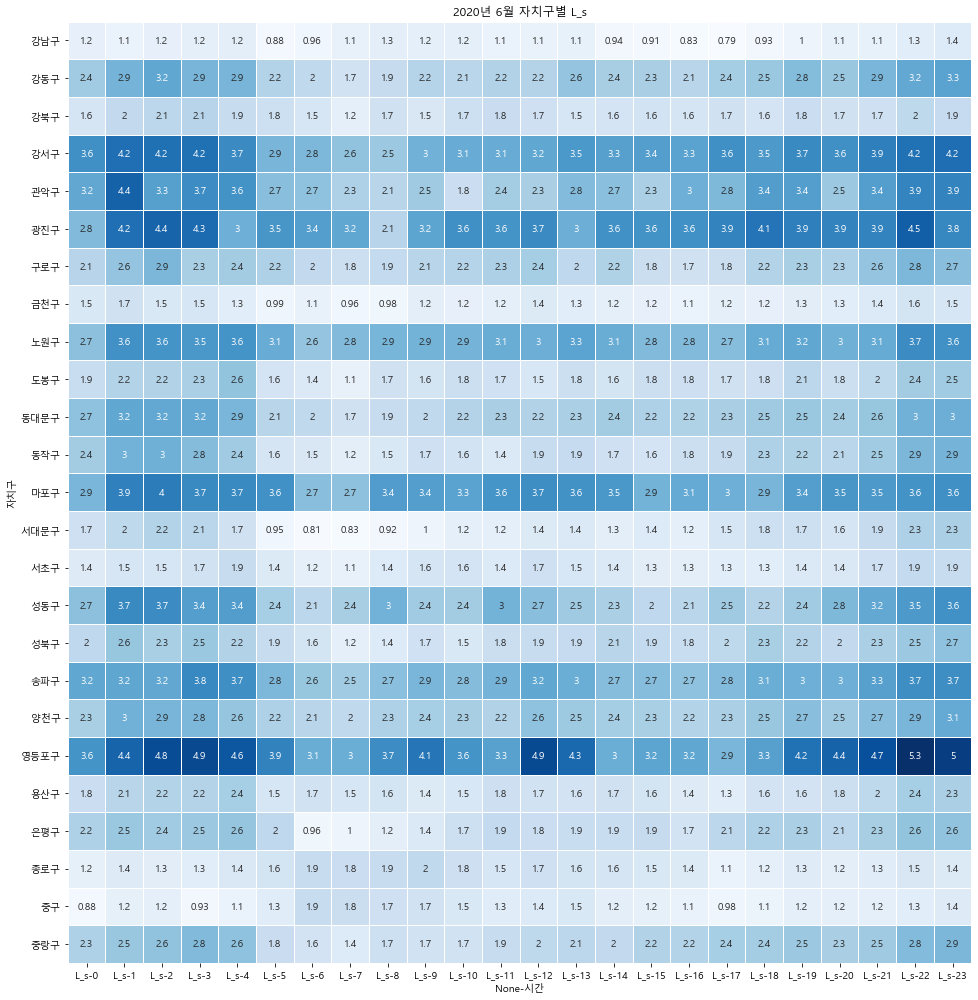

In [33]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월 자치구별 L_s')
plt.tight_layout()
plt.show()

In [34]:
df_pivot_L_s_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['L_s'], aggfunc = 'std')
df_pivot_L_s_std.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  1.736877  1.307978  1.493322  1.906752  2.081422  1.557506  1.765775   
강동구  2.993739  3.339208  3.543434  3.336007  3.444454  3.383298  3.339578   
강북구  2.088329  2.213065  2.339361  2.399949  2.036537  2.382660  2.484972   
강서구  4.319524  4.729971  4.628966  4.908967  4.365618  4.744586  4.957859   
관악구  5.457531  7.565536  5.656055  5.981210  5.865931  5.085767  5.936143   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  1.592413  1.936370  1.990981  1.949536  1.613467  1.580904  1.815577   
강동구  2.842230  2.682743  2.976533  2.699070  2.422433  2.121941  3.139382   
강북구  1.854989  2.333268  2.211957  2.450355  2.292275  2.113132  1.787165   
강서구  4.583711  3.375474  4.135912  4.363197  4.077990  3.925376  4.180978   
관악구  6.875825  4.789249  6.616626  3.079133  5.530634  4.928026  5.625992   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  1.164553  1.027122  0.878319  1.054742  1.131108  1.100500  1.566722   
강동구  2.873275  2.741067  2.230491  2.537281  2.556760  2.793384  2.559174   
강북구  1.776112  1.884758  1.620000  1.785260  1.495737  1.850517  1.672171   
강서구  3.393181  3.699223  4.128050  4.200453  3.399143  3.534547  3.602206   
관악구  6.048941  2.909583  5.430100  5.621626  6.297231  5.050551  2.963276   

                                   
시간         21        22        23  
자치구                                
강남구  1.312486  1.733842  1.921867  
강동구  2.835076  3.183375  3.371841  
강북구  1.640298  2.049097  1.992506  
강서구  4.084666  4.105586  4.004967  
관악구  4.940656  5.750045  5.468447

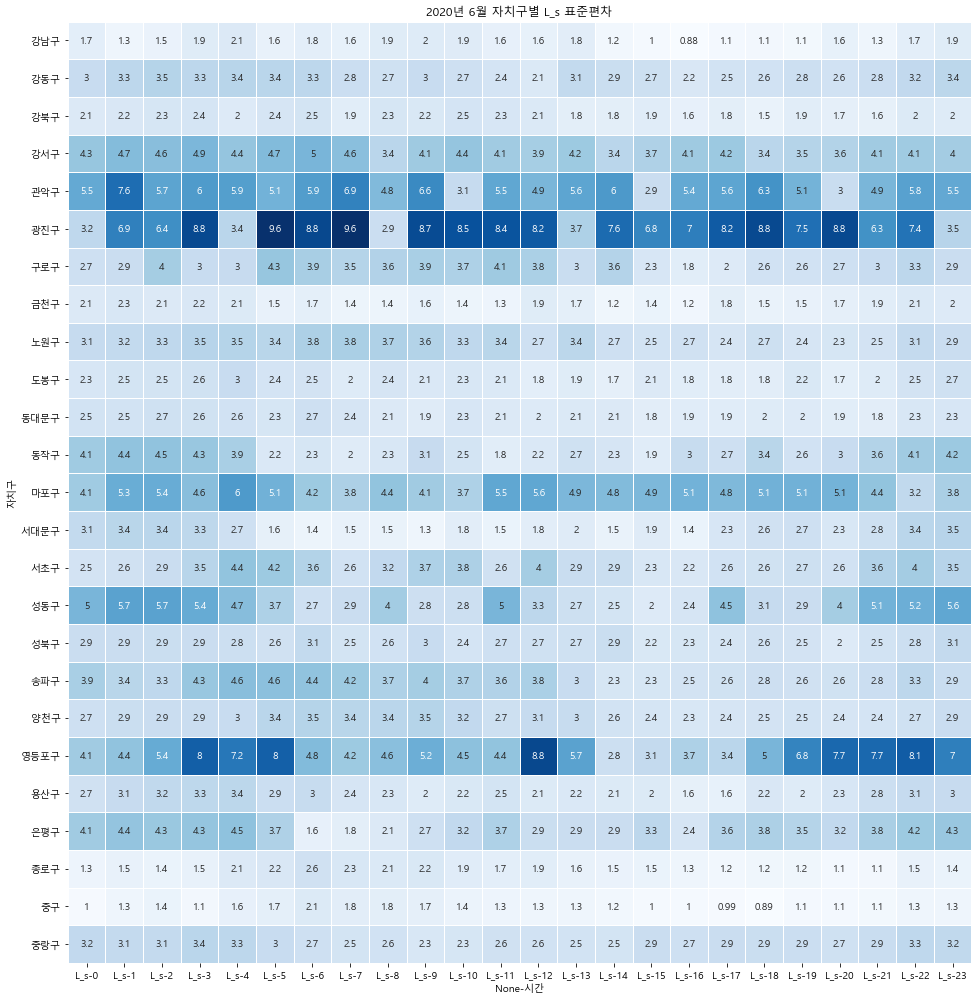

In [35]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월 자치구별 L_s 표준편차')
plt.tight_layout()
plt.show()

In [36]:
df_pivot_W_s = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['W_s'])
df_pivot_W_s.head()

W_s                                                         \
시간          0          1          2          3          4          5    
자치구                                                                     
강남구   9.099581   9.859295  15.468250  20.112686  39.617594  33.994547   
강동구   9.046492  14.838396  25.654092  40.895759  57.709115  36.679885   
강북구   5.112212   8.945778  11.132208  23.757215  31.924104  34.295106   
강서구  10.811855  18.525865  30.238644  51.667549  53.101230  46.297556   
관악구   6.469211  10.332387  15.504800  26.762957  32.291011  26.542956   

                                                                      \
시간          6          7         8          9          10         11   
자치구                                                                    
강남구  20.570986   8.324044  5.418617   6.464643   7.798476   6.285458   
강동구  23.591628   6.529046  5.592483   9.245610   9.447683   9.301975   
강북구  24.437396   9.813901  7.824494  10.344567  12.951950  13.415281   
강서구  29.582572   8.204620  5.024097   8.325137   9.017704   7.698895   
관악구  18.012515  12.791427  5.192266   8.047722   8.737511   7.508426   

                                                                           \
시간         12        13        14        15        16        17        18   
자치구                                                                         
강남구  5.778275  6.286622  4.821570  4.543884  3.313988  2.289815  2.194147   
강동구  9.585239  7.847362  7.670089  6.237504  5.097050  4.309125  3.587439   
강북구  9.229126  7.382863  6.921177  6.141284  5.232889  4.230666  3.334634   
강서구  6.608014  6.737381  6.445631  5.704861  4.665173  3.778150  2.831509   
관악구  7.556733  6.852272  6.379477  7.044082  5.465906  4.077547  3.086856   

                                                       
시간         19        20        21        22        23  
자치구                                                    
강남구  3.340401  3.676632  4.623213  5.532602  9.112270  
강동구  3.818263  3.378159  4.434531  5.542616  8.539775  
강북구  3.652238  3.643508  4.044325  4.668465  5.195763  
강서구  3.374184  3.783234  4.543114  6.022082  8.671046  
관악구  3.310081  2.921060  3.858857  5.049906  6.204761

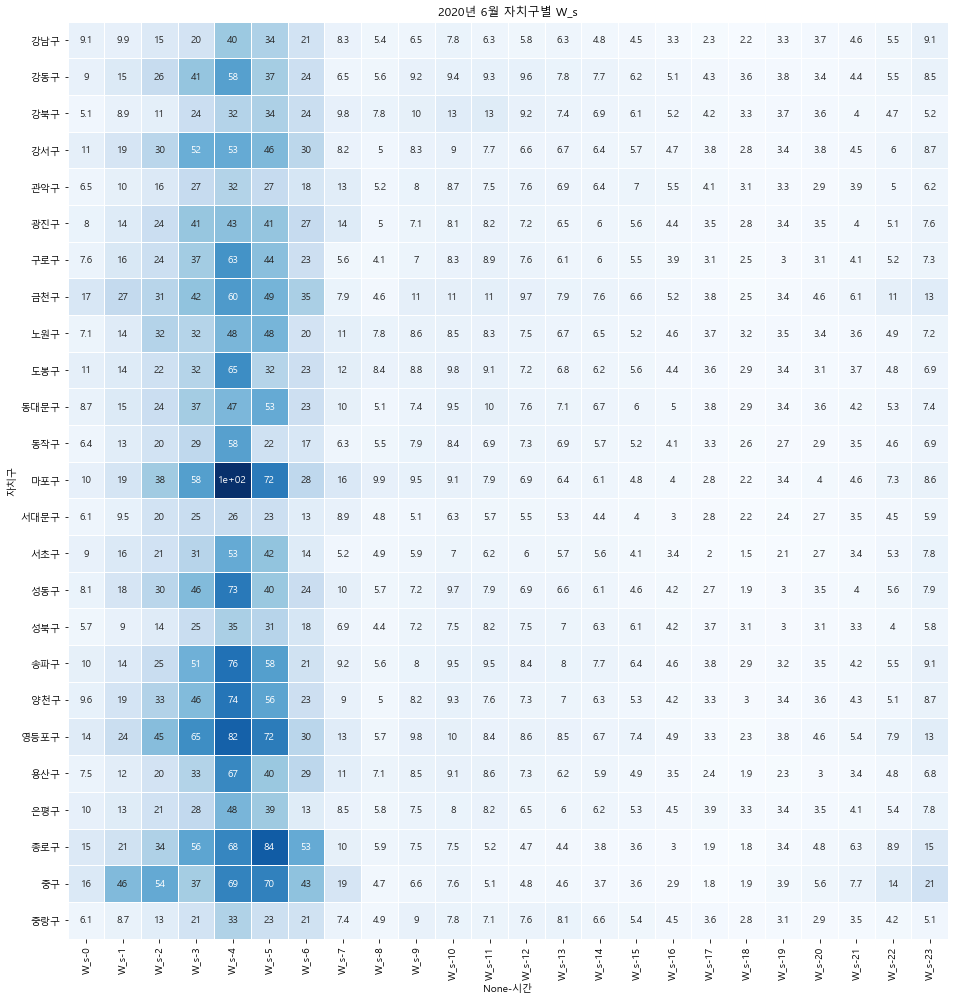

In [37]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월 자치구별 W_s')
plt.tight_layout()
plt.show()

In [38]:
df_pivot_W_s_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['W_s'], aggfunc = 'std')
df_pivot_W_s_std.head()

W_s                                                         \
시간          0          1          2          3          4          5    
자치구                                                                     
강남구  11.679649  10.439541  23.421725  24.963788  69.818464  59.275120   
강동구  10.692481  14.367951  34.041541  57.667878  68.616918  51.572239   
강북구   5.280687   8.531520   8.363442  37.385702  34.729632  33.532521   
강서구  13.046365  18.266891  31.593495  63.354926  57.912550  98.478721   
관악구   6.827970   7.940543  17.845546  28.581039  36.126390  26.265250   

                                                                      \
시간          6          7         8          9          10         11   
자치구                                                                    
강남구  31.113574   8.346029  5.372846   6.585714   7.055323   5.131630   
강동구  36.272342   7.247546  5.596213   9.362874   7.053723   6.159438   
강북구  27.314564  10.321849  6.350414  12.196792  12.690262  13.743084   
강서구  44.868012  10.446326  8.233671   9.670535   7.425406   5.464268   
관악구  17.843401  23.345563  6.051506   7.763336   8.020045   5.214030   

                                                                           \
시간         12        13        14        15        16        17        18   
자치구                                                                         
강남구  5.257186  6.360028  4.094855  6.040686  3.235916  2.523023  1.993085   
강동구  9.668352  5.372319  5.049924  3.663965  3.310518  2.970890  2.898098   
강북구  7.180890  6.338501  5.491526  4.868948  3.774781  2.678819  2.210195   
강서구  4.059189  3.982053  3.749077  3.412104  3.241388  2.441104  2.106202   
관악구  6.852398  4.760138  4.468487  7.197529  4.028157  3.299725  2.068310   

                                                       
시간         19        20        21        22        23  
자치구                                                    
강남구  3.260958  3.201446  4.936355  4.591559  9.737301  
강동구  2.165901  1.729024  3.168617  3.380166  7.651417  
강북구  2.047352  2.414861  2.644595  2.869734  3.161441  
강서구  1.925535  2.290252  2.856892  4.435277  6.318517  
관악구  2.081839  1.714484  2.477266  3.536652  4.359501

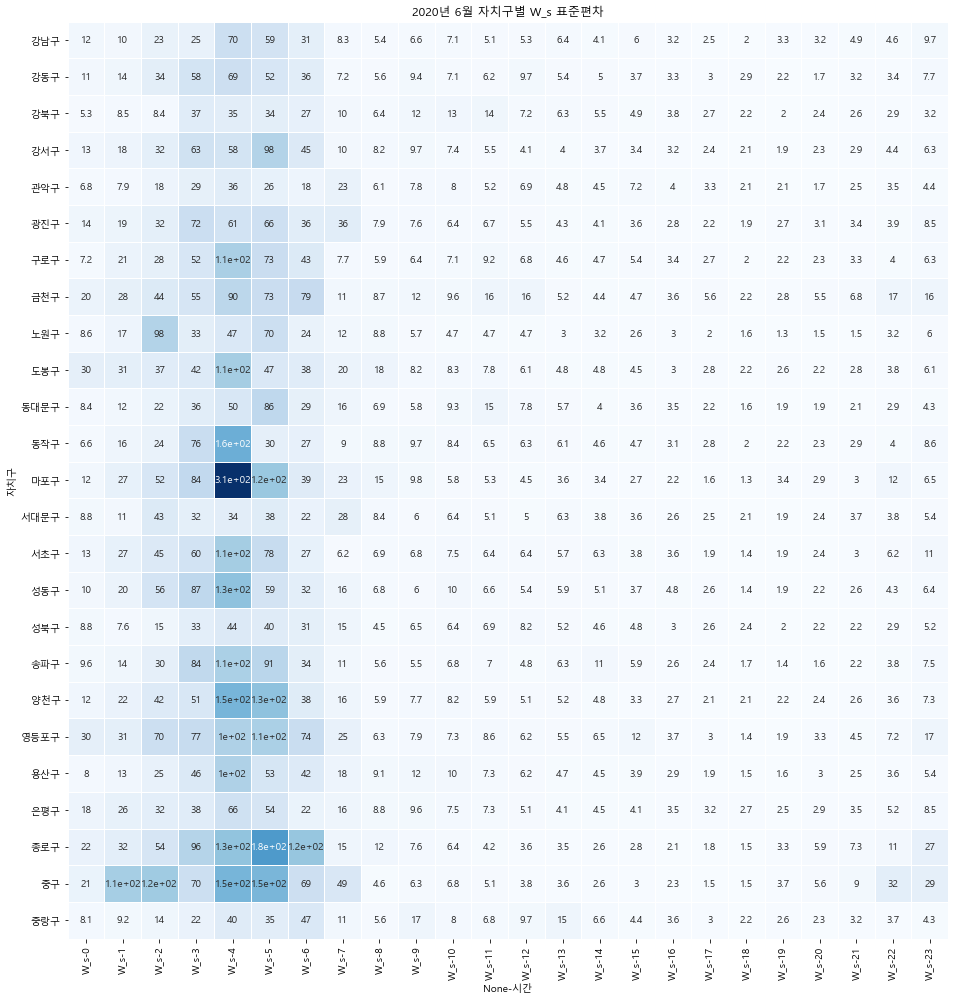

In [39]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월 자치구별 W_s 표준편차')
plt.tight_layout()
plt.show()

# 학교/ 아파트/ 지하철역/공원 근처 대여소 분석

In [40]:
s = pd.DataFrame(df['대여소명'].unique()).rename(columns = {0 : 'station'})
s

,station
0,(구)신한은행 중랑교지점
1,(재)FITI시험연구원
2,3호선 매봉역 3번출구앞
3,419민주묘지 입구사거리
4,419민주묘지역
...,...
2004,흑석한강푸르지오 106동앞
2005,흑석한강푸르지오(110동)
2006,흥국사 정류장
2007,희성오피앙


In [41]:
school = []
subway = []
apart = []
park = []
for i in range(len(s)):
    if '출구' in s['station'][i]:
        subway.append(s['station'][i])
    elif '학교' in s['station'][i]:
        school.append(s['station'][i])
    elif '아파트' in s['station'][i]:
        apart.append(s['station'][i]) 
    elif '공원' in s['station'][i]:
        park.append(s['station'][i])

In [42]:
school

['KC 대학교',
 '가락고등학교 앞',
 '가재울 초등학교',
 '강남중학교 앞',
 '강동경희대학교병원 입구',
 '강북중학교 앞',
 '강서공업고등학교 앞',
 '강서초등학교',
 '개포고등학교 정문앞',
 '거여초등학교 옆',
 '건국대학교 (입학정보관)',
 '건국대학교 (행정관)',
 '건국대학교 과학관(이과대) 앞',
 '건국대학교 학생회관',
 '경기여자고등학교 후문 (삼성로3길 입구)',
 '경문고등학교 앞',
 '경일중학교 앞',
 '경희대학교 청운관',
 '고덕초등학교',
 '공항중학교앞',
 '공항초등학교건너편',
 '광남중학교',
 '광양중학교 앞',
 '광운대학교 중앙도서관',
 '광운초등학교 앞',
 '구로중학교앞',
 '구암초등학교 버스정류장',
 '구일고등학교 정문',
 '노일초등학교 앞',
 '답십리초등학교 앞(현대시장 옆)',
 '답십리초등학교 옆 공원',
 '대광고등학교',
 '대진고등학교',
 '도봉고등학교 맞은편',
 '독산고등학교',
 '동대문중학교 옆',
 '동성중학교 앞',
 '동양미래대학교 정문 옆',
 '마곡엠밸리6_7단지 마곡중학교',
 '마곡중학교 후문',
 '면목초등학교',
 '명지대학교 도서관',
 '명지전문대학교 정문 앞',
 '모두의학교',
 '묘곡초등학교',
 '밀알학교 입구 (삼성서울병원 입구)',
 '반포중학교 앞(세화여고 맞은편)',
 '방이초등학교',
 '방학중학교 앞',
 '배명고등학교',
 '백석예술대학교 제3캠퍼스 앞',
 '보성중고등학교 후문 앞',
 '북가좌 초등학교',
 '불암고등학교 앞 횡단보도',
 '사당중학교 버스정류소',
 '삼일초등학교 인근',
 '상계중학교(당현2교사거리)',
 '상신초등학교앞 버스정류장',
 '상암월드컵파크5단지(상암중학교)',
 '상암중학교 옆',
 '상일초등학교',
 '새솔초등학교',
 '서울강월초등학교 앞',
 '서울과학기술대학교(어학교육원)',
 '서울대학교 정문',
 '서울도봉초등학교인근',
 '서울디자인직업전문학교 앞',
 '서울미래초등학교 

In [43]:
len(school)

128

In [44]:
school_data = []
for i in range(len(df)):
    if df['대여소명'][i] in school:
        school_data.append(df.loc[i])
school_data = pd.DataFrame(school_data)
school_data['특성'] = '학교'
school_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
891,강서구,KC 대학교,0,0.108333,0.008333,13.000000,0.928571,120.000000,학교
892,강서구,KC 대학교,1,0.075000,0.008333,9.000000,0.900000,120.000000,학교
893,강서구,KC 대학교,2,0.125000,0.008333,15.000000,0.937500,120.000000,학교
894,강서구,KC 대학교,3,0.108333,0.025000,4.333333,0.812500,40.000000,학교
895,강서구,KC 대학교,4,0.041667,0.025000,1.666667,0.625000,40.000000,학교
...,...,...,...,...,...,...,...,...,...
48442,동대문구,휘봉고등학교 앞,19,0.541667,0.575000,0.942029,0.960211,2.582738,학교
48443,동대문구,휘봉고등학교 앞,20,0.300000,0.450000,0.666667,0.736842,3.111111,학교
48444,동대문구,휘봉고등학교 앞,21,0.500000,0.400000,1.250000,1.147541,3.888889,학교
48445,동대문구,휘봉고등학교 앞,22,0.483333,0.241667,2.000000,1.428571,6.896552,학교


In [45]:
subway

['3호선 매봉역 3번출구앞',
 '7호선 이수역7번출구',
 '9호선종합운동장역 9번출구',
 'DMC역 2번출구 옆',
 'DMC역 9번출구 앞',
 'DMC역7번출구',
 '가락시장역 3번 출구',
 '가로공원공영주차장 1번 출구',
 '가산디지털단지 7번출구',
 '가양역 8번출구',
 '가좌역 4번출구 앞',
 '가좌역1 번출구 뒤',
 '강남구청역 2번출구 뒤',
 '강남파이낸스센터앞(역삼역2번출구)',
 '강동역 1번출구 앞',
 '강변역 4번출구 뒤',
 '개봉역 1번 출구 자전거보관서쪽',
 '개화산역 2번 출구',
 '거여역 3번출구',
 '거여역 8번출구 뒤',
 '건대입구역 5번출구 뒤',
 '경복궁역 4번출구 뒤',
 '경복궁역 7번출구 앞',
 '경찰병원역 1,2번 출구 사이',
 '경찰병원역 3번출구 앞',
 '고덕역 4번출구',
 '고려대학교 2번출구',
 '고속터미널역 5번출구 앞',
 '고속터미널역 8-1번, 8-2번 출구 사이',
 '공덕역 2번출구',
 '공덕역 5번출구',
 '공덕역 8번출구',
 '공릉역 1번 출구 앞',
 '공항시장역 2번출구 뒤',
 '공항시장역 4번출구',
 '광나루역 3번 출구',
 '광화문역 1번출구 앞',
 '광화문역 2번출구 앞',
 '광화문역 5번출구',
 '광화문역 6번출구 옆',
 '광화문역 7번출구 앞',
 '광흥창역 2번출구 앞',
 '교대역 5번출구뒤',
 '교대역 6번출구',
 '교보타워 버스정류장(신논현역 3번출구 후면)',
 '구산역 2번 출구',
 '구산역 4번출구',
 '구파발역 2번출구',
 '국회의사당역 3번출구 옆',
 '국회의사당역 5번출구 옆',
 '군자역 7번출구 베스트샵 앞',
 '군자역 7번출구뒤',
 '군자역2번출구',
 '금호역 1번출구 앞',
 '금호역 3번출구',
 '길음역 3번출구 뒤',
 '까치산역 3번 출구',
 '낙성대역 1번출구',
 '낙성대역 3번출구 뒤',
 '낙성대역 8번 출구',
 '남부터미널역 1번출구',
 '남성역3번출구 뒤',
 '

In [46]:
len(subway)

408

In [47]:
subway_data = []
for i in range(len(df)):
    if df['대여소명'][i] in subway:
        subway_data.append(df.loc[i])
subway_data = pd.DataFrame(subway_data)
subway_data['특성'] = '지하철'
subway_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
48,강남구,3호선 매봉역 3번출구앞,0,0.291667,0.283333,1.029412,2.057954,8.951385,지하철
49,강남구,3호선 매봉역 3번출구앞,1,0.116667,0.291667,0.400000,0.614937,5.353976,지하철
50,강남구,3호선 매봉역 3번출구앞,2,0.183333,0.191667,0.956522,1.911173,12.753738,지하철
51,강남구,3호선 매봉역 3번출구앞,3,0.075000,0.075000,1.000000,2.000000,33.333333,지하철
52,강남구,3호선 매봉역 3번출구앞,4,0.091667,0.033333,2.750000,3.460566,104.992701,지하철
...,...,...,...,...,...,...,...,...,...
48514,동작구,흑석역 4번출구,19,0.750000,0.808333,0.927835,1.850560,2.977140,지하철
48515,동작구,흑석역 4번출구,20,0.675000,0.675000,1.000000,2.000000,3.703704,지하철
48516,동작구,흑석역 4번출구,21,0.808333,0.658333,1.227848,2.403214,4.182630,지하철
48517,동작구,흑석역 4번출구,22,0.841667,0.458333,1.836364,3.055819,6.960008,지하철


In [48]:
apart

['DMC엘가아파트 앞',
 'ESA아파트 상가 앞',
 'LG한강 자이아파트 앞',
 'LIGA 아파트 앞',
 'LIG강촌아파트 103동앞',
 'e 편한세상 보문아파트 내',
 '가락미륭아파트 앞',
 '가락삼환아파트 앞',
 '강남한양수자인아파트',
 '강동롯데캐슬퍼스트 아파트(관리동)',
 '강변아파트 310동 앞',
 '개봉아이파크아파트 앞',
 '개봉푸르지오아파트 상가',
 '개포1단지아파트 입구 (보도육교)',
 '개포래미안포레스트아파트 107동 앞',
 '건영아파트 앞',
 '고덕동 아남아파트',
 '고척LIGA아파트 앞',
 '공릉1단지아파트',
 '공릉동풍림아파트 101동',
 '공릉풍림아파트 108동',
 '구로동롯데아파트',
 '구룡마을 입구 (래미안블레스티지 아파트)',
 '구룡초사거리 (현대아파트10동 앞 )',
 '구룡터널 입구(개포1단지아파트)',
 '구의7단지현대아파트',
 '극동늘푸른아파트',
 '금강수목원아파트 앞',
 '금호 어울림 아파트 앞',
 '길음뉴타운푸르지오아파트 3단지',
 '길음래미안아파트817동 상가 앞',
 '남산타운아파트 버스정류장',
 '다성이즈빌아파트(호원대 대각선 맞은편)',
 '답십리 래미안엘파인아파트 입구',
 '대림경동아파트앞',
 '대림아파트 사거리',
 '대림아파트 후문 상가 옆',
 '대호프라자아파트',
 '도곡동 경남아파트 건너편',
 '도봉한신아파트 주변',
 '돈암삼성풍림아파트',
 '동대문롯데캐슬아파트 앞',
 '동신아파트 104동 앞',
 '두산대림아파트 삼거리',
 '두산위브아파트 옆 상가건물 앞',
 '래미안금호하이리버 아파트 102동 옆',
 '래미안라센트아파트 103동 앞',
 '래미안신공덕3차아파트',
 '래미안월곡아파트 입구',
 '리센츠아파트',
 '마천금호어울림 1차아파트 건너편',
 '멤피스아파트 앞',
 '면목 대원칸타빌아파트',
 '면목도시개발아파트 1동 앞',
 '면목삼익아파트 앞',
 '목동11단지 아파트',
 '목동1단지아파트 118동 앞',
 '목동1단지

In [49]:
len(apart)

173

In [50]:
apart_data = []
for i in range(len(df)):
    if df['대여소명'][i] in apart:
        apart_data.append(df.loc[i])
apart_data = pd.DataFrame(apart_data)
apart_data['특성'] = '아파트'
apart_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
410,서대문구,DMC엘가아파트 앞,0,0.158333,0.108333,1.461538,0.593750,9.230769,아파트
411,서대문구,DMC엘가아파트 앞,1,0.083333,0.100000,0.833333,0.454545,10.000000,아파트
412,서대문구,DMC엘가아파트 앞,2,0.016667,0.033333,0.500000,0.333333,30.000000,아파트
413,서대문구,DMC엘가아파트 앞,3,0.008333,0.025000,0.333333,0.250000,40.000000,아파트
414,서대문구,DMC엘가아파트 앞,4,0.000000,0.000000,0.000000,0.000000,0.000000,아파트
...,...,...,...,...,...,...,...,...,...
47719,서대문구,홍은센트레빌 아파트 앞,19,0.250000,0.541667,0.461538,0.000000,0.000000,아파트
47720,서대문구,홍은센트레빌 아파트 앞,20,0.100000,0.308333,0.324324,0.000000,0.000000,아파트
47721,서대문구,홍은센트레빌 아파트 앞,21,0.191667,0.183333,1.045455,0.000000,0.000000,아파트
47722,서대문구,홍은센트레빌 아파트 앞,22,0.108333,0.125000,0.866667,0.000000,0.000000,아파트


In [51]:
park

['가온문화공원',
 '강일 다솜 어린이 공원',
 '계남공원 입구 주출입구 좌측',
 '고척근린공원 고척도서관 앞',
 '구로리공원',
 '구룡근린공원',
 '구의공원(테크노마트 앞)',
 '궁동생태공원',
 '금암 문화공원',
 '금천폭포공원 앞',
 '길음8골어린이공원 옆',
 '꿈돌이공원 앞',
 '나들목공원',
 '내곡3단지 어린이공원 앞',
 '노들나루공원 입구',
 '노량진근린공원 대방공원',
 '노해근린공원내',
 '늘푸른공원 앞',
 '능골근린공원',
 '다산 어린이공원',
 '달맞이공원',
 '당고개공원 대여소',
 '당현천근린공원',
 '대학로 마로니에공원',
 '독립문 어린이 공원',
 '독산근린공원 입구',
 '동명근린공원 진입로 (아리수로)',
 '동인오피스텔 건너편 소공원',
 '뒷벌공원 옆',
 '등나무 근린공원(시립북서울미술관 앞)',
 '마포 신수공원 앞',
 '마포어린이공원',
 '만해공원',
 '말우물 어린이 공원',
 '명일근린공원공동체텃밭',
 '목마공원',
 '목월공원 앞',
 '문배어린이공원 앞',
 '문정동 근린공원',
 '문정동 글샘 공원',
 '문화촌 공원',
 '미래사랑어린이공원 앞',
 '방화근린공원',
 '백토공원 앞',
 '볏골공원',
 '보라매공원 보도육교',
 '보라매공원 정문',
 '부엉이공원 앞',
 '북한산생태공원입구(교통섬)',
 '사육신공원앞',
 '사평리 공원',
 '삼성도로공원',
 '삼청공원 앞',
 '상림마을 생태공원',
 '샛강생태공원방문자센터 앞',
 '샛마을 근린공원',
 '생태공원앞 교차로(조명탑)',
 '서강나루 공원',
 '서남환경공원 버스정류장',
 '석촌호수교차로 (송파나루근린공원 앞)',
 '섬들근린공원',
 '세종로공원',
 '솔밭공원역',
 '송이공원',
 '신내능말공원',
 '신내어울공원 앞',
 '신도림테크노근린공원',
 '신트리공원 입구',
 '앙카라공원 앞',
 '양지근린공원앞',
 '어린이대공원정문',
 '연서어린이공원',
 '연의근린공원 건너편',
 '영동

In [52]:
len(park)

101

In [53]:
park_data = []
for i in range(len(df)):
    if df['대여소명'][i] in park:
        park_data.append(df.loc[i])
park_data = pd.DataFrame(park_data)
park_data['특성'] = '공원'
park_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
2457,마포구,가온문화공원,0,0.075000,0.066667,1.125000,1.646653,31.175115,공원
2458,마포구,가온문화공원,1,0.058333,0.033333,1.750000,2.144056,70.645161,공원
2459,마포구,가온문화공원,2,0.041667,0.075000,0.555556,0.828841,21.721854,공원
2460,마포구,가온문화공원,3,0.016667,0.025000,0.666667,1.015385,69.473684,공원
2461,마포구,가온문화공원,4,0.066667,0.041667,1.600000,2.053587,55.255814,공원
...,...,...,...,...,...,...,...,...,...
48370,중구,훈련원공원주차장 앞,19,0.291667,0.391667,0.744681,1.431514,5.464552,공원
48371,중구,훈련원공원주차장 앞,20,0.258333,0.350000,0.738095,1.415646,6.085653,공원
48372,중구,훈련원공원주차장 앞,21,0.258333,0.533333,0.484375,0.802427,3.199468,공원
48373,중구,훈련원공원주차장 앞,22,0.125000,0.608333,0.205479,0.256788,2.057223,공원


In [54]:
data = pd.merge(school_data, subway_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data = pd.merge(data, apart_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data = pd.merge(data, park_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
0,강서구,KC 대학교,0,0.108333,0.008333,13.000000,0.928571,120.000000,학교
1,강서구,KC 대학교,1,0.075000,0.008333,9.000000,0.900000,120.000000,학교
2,강서구,KC 대학교,2,0.125000,0.008333,15.000000,0.937500,120.000000,학교
3,강서구,KC 대학교,3,0.108333,0.025000,4.333333,0.812500,40.000000,학교
4,강서구,KC 대학교,4,0.041667,0.025000,1.666667,0.625000,40.000000,학교
...,...,...,...,...,...,...,...,...,...
19595,중구,훈련원공원주차장 앞,19,0.291667,0.391667,0.744681,1.431514,5.464552,공원
19596,중구,훈련원공원주차장 앞,20,0.258333,0.350000,0.738095,1.415646,6.085653,공원
19597,중구,훈련원공원주차장 앞,21,0.258333,0.533333,0.484375,0.802427,3.199468,공원
19598,중구,훈련원공원주차장 앞,22,0.125000,0.608333,0.205479,0.256788,2.057223,공원


In [55]:
data_pivot_lambda = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['lambda_15'])
data_pivot_lambda.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.324603  0.297360  0.196205  0.125330  0.086716  0.077475  0.125165   
아파트  0.291667  0.256705  0.177921  0.116763  0.078565  0.061127  0.075193   
지하철  0.459455  0.394251  0.287745  0.189788  0.129208  0.132945  0.240829   
학교   0.295777  0.246615  0.150065  0.105990  0.079883  0.048568  0.074349   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.251073  0.432108  0.290842  0.252310  0.274835  0.330281  0.344224   
아파트  0.180877  0.329191  0.202938  0.184827  0.208141  0.258815  0.261079   
지하철  0.512868  0.812868  0.532824  0.411499  0.457169  0.545568  0.574796   
학교   0.169857  0.358984  0.236654  0.190560  0.202083  0.261979  0.276628   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.365017  0.416584  0.523432  0.707756  1.049340  0.991089  0.927558   
아파트  0.279335  0.320713  0.388969  0.557996  0.830780  0.785116  0.681888   
지하철  0.598856  0.667565  0.812398  1.124387  1.519465  1.285355  1.153391   
학교   0.282943  0.303646  0.354297  0.497656  0.726628  0.662891  0.593685   

                                   
시간         21        22        23  
특성                                 
공원   0.909488  0.833333  0.583993  
아파트  0.688198  0.678276  0.503661  
지하철  1.124285  1.028125  0.732108  
학교   0.604557  0.605794  0.458659

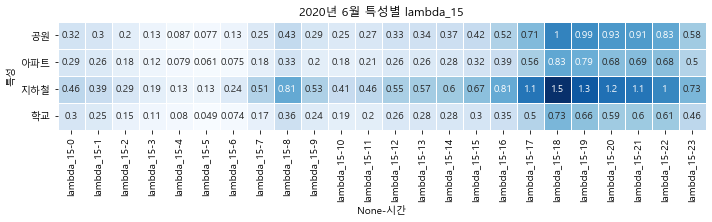

In [56]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월 특성별 lambda_15')
plt.tight_layout()
plt.show()

In [57]:
data_pivot_lambda_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['lambda_15'], aggfunc = 'std')
data_pivot_lambda_std.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.370469  0.284695  0.209502  0.130862  0.089219  0.085241  0.126793   
아파트  0.334364  0.241052  0.178086  0.122062  0.082497  0.072399  0.099449   
지하철  0.580681  0.421301  0.297365  0.194921  0.129794  0.139678  0.282952   
학교   0.356834  0.275046  0.172101  0.132287  0.089969  0.059939  0.089531   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.309802  0.467343  0.282876  0.260657  0.259120  0.315440  0.337778   
아파트  0.328086  0.668172  0.262706  0.212443  0.216456  0.285237  0.267501   
지하철  0.608432  0.942314  0.546648  0.392364  0.433371  0.508110  0.524442   
학교   0.179003  0.430756  0.281283  0.214553  0.210569  0.268014  0.281035   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.348254  0.411651  0.468180  0.628509  0.899411  0.902285  0.904128   
아파트  0.271912  0.320587  0.390256  0.532636  0.802385  0.793608  0.739410   
지하철  0.551120  0.635523  0.809909  1.146401  1.582582  1.507461  1.647321   
학교   0.303209  0.309887  0.372650  0.542119  0.804971  0.746141  0.701535   

                                   
시간         21        22        23  
특성                                 
공원   0.860230  0.785849  0.554119  
아파트  0.751662  0.662401  0.467734  
지하철  1.639067  1.414913  0.929387  
학교   0.658674  0.638356  0.501487

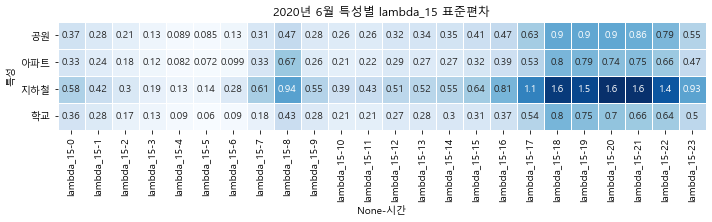

In [58]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월 특성별 lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [59]:
data_pivot_mu = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['mu_15'])
data_pivot_mu.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.243386  0.223845  0.138036  0.083168  0.068317  0.115924  0.241172   
아파트  0.224074  0.209148  0.135920  0.093256  0.066618  0.101782  0.208333   
지하철  0.428686  0.343650  0.251062  0.169914  0.112684  0.107986  0.200470   
학교   0.209459  0.172656  0.116081  0.073828  0.059049  0.072201  0.172852   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.525825  0.568791  0.360726  0.302640  0.315594  0.360726  0.362789   
아파트  0.424711  0.494942  0.284008  0.236657  0.247013  0.282755  0.285453   
지하철  0.490870  0.823550  0.495823  0.402369  0.452717  0.531311  0.578370   
학교   0.377865  0.475391  0.293359  0.245247  0.253125  0.270703  0.292513   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.395545  0.449917  0.589356  0.791089  1.016832  0.890347  0.898597   
아파트  0.309489  0.341859  0.428420  0.591667  0.768064  0.720617  0.669653   
지하철  0.626348  0.730801  0.892504  1.263337  1.656924  1.325184  1.180923   
학교   0.323177  0.362109  0.453451  0.561523  0.675781  0.606120  0.556510   

                                   
시간         21        22        23  
특성                                 
공원   0.782508  0.627558  0.413696  
아파트  0.589836  0.484730  0.345231  
지하철  1.088807  0.904391  0.659334  
학교   0.513737  0.439714  0.325195

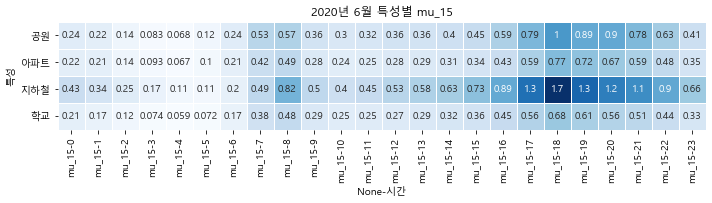

In [60]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월 특성별 mu_15')
plt.tight_layout()
plt.show()

In [61]:
data_pivot_mu_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['mu_15'], aggfunc = 'std')
data_pivot_mu_std.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.275095  0.199771  0.131658  0.077648  0.068557  0.115771  0.240670   
아파트  0.265013  0.200635  0.138753  0.100014  0.076790  0.107872  0.214136   
지하철  0.563308  0.388290  0.275321  0.179298  0.125702  0.111069  0.203907   
학교   0.264312  0.200172  0.138073  0.088258  0.076812  0.095229  0.213745   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.459972  0.481835  0.303616  0.241664  0.258687  0.288291  0.330766   
아파트  0.405713  0.492486  0.261552  0.206812  0.275755  0.268806  0.266243   
지하철  0.520624  0.880918  0.442524  0.342951  0.396657  0.456818  0.492263   
학교   0.427426  0.451671  0.267157  0.203716  0.214906  0.241738  0.263610   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.350047  0.390423  0.500672  0.692357  0.906651  0.813298  0.865721   
아파트  0.276943  0.313116  0.400177  0.632264  0.768251  0.740833  0.694137   
지하철  0.570112  0.698247  0.853668  1.251021  1.638064  1.482567  1.501818   
학교   0.281025  0.340755  0.427480  0.553943  0.736761  0.676296  0.600912   

                                   
시간         21        22        23  
특성                                 
공원   0.785823  0.588157  0.385679  
아파트  0.647340  0.516900  0.363952  
지하철  1.536343  1.258403  0.881631  
학교   0.588497  0.506088  0.376352

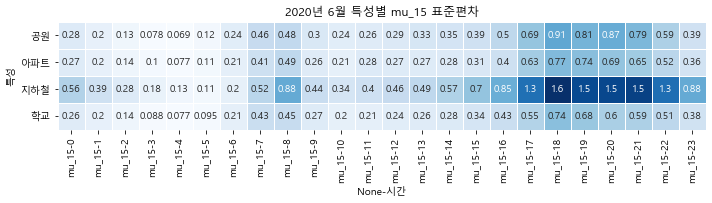

In [62]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월 특성별 mu_15 표준편차')
plt.tight_layout()
plt.show()

In [63]:
data_pivot_rho = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['rho'])
data_pivot_rho.head()

rho                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   1.169277  1.630518  1.487887  1.521765  1.760231  1.030755  1.372533   
아파트  1.136040  1.280876  1.574170  1.264455  1.411675  0.823455  0.503184   
지하철  0.923638  1.141138  1.261844  1.203765  1.361314  1.726868  1.536337   
학교   1.608066  1.624097  1.543214  1.580669  1.310296  0.849833  0.763643   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.650079  0.883341  0.945986  0.850549  0.952511  0.979834  0.976534   
아파트  0.510067  0.574349  0.694507  0.723448  0.840339  0.878967  0.859221   
지하철  1.348893  1.059146  1.154288  1.022681  0.980785  1.002313  0.966587   
학교   1.104919  1.212251  0.906165  0.773136  0.847966  0.939178  0.943883   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.905142  0.931282  0.874524  0.914793  1.132673  1.101982  1.052782   
아파트  0.893021  0.941668  0.867219  0.982929  1.195356  1.040095  1.046209   
지하철  0.970120  0.937268  0.907480  0.918973  0.927164  0.958098  0.937808   
학교   0.796748  0.855118  0.770607  0.918447  1.132583  1.120968  0.996901   

                                   
시간         21        22        23  
특성                                 
공원   1.272903  1.443534  1.494870  
아파트  1.178366  1.518419  1.727427  
지하철  1.031904  1.139687  1.124403  
학교   1.226825  1.561794  1.712412

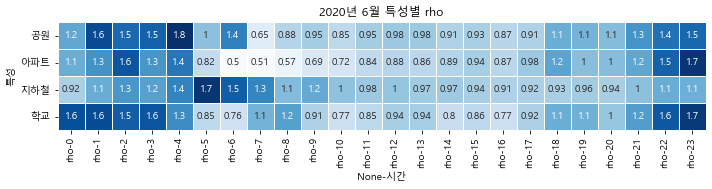

In [64]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월 특성별 rho')
plt.tight_layout()
plt.show()

In [65]:
data_pivot_L_s = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['L_s'])
data_pivot_L_s.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   2.475199  3.161179  3.295256  3.054968  3.094345  1.501309  1.363990   
아파트  1.882463  2.284728  2.363750  2.175183  2.126452  1.234834  0.686159   
지하철  3.066618  3.785652  3.852210  4.112641  3.903814  4.104033  3.819058   
학교   1.919269  2.228548  2.035696  1.950562  1.982087  1.284935  0.873632   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   1.115976  1.744221  1.664080  1.817491  1.929548  2.226751  2.203405   
아파트  0.771244  1.031991  1.263838  1.326790  1.589907  1.732299  1.708109   
지하철  3.440025  3.139635  3.561018  3.516007  3.511048  3.786739  3.358997   
학교   0.825240  1.212918  1.279187  1.237910  1.376063  1.693632  1.691077   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   2.235367  2.344370  2.174490  2.229549  2.642074  2.761535  2.578265   
아파트  1.603552  1.777807  1.695231  1.831691  2.069369  2.033621  1.881777   
지하철  3.157350  2.883499  2.976916  2.994210  3.116176  3.329336  3.366229   
학교   1.517224  1.400212  1.305681  1.663180  1.909070  1.852544  1.887066   

                                   
시간         21        22        23  
특성                                 
공원   2.926500  3.170252  3.235561  
아파트  2.200497  2.474742  2.555328  
지하철  3.597857  4.107456  3.725592  
학교   2.024274  2.264847  2.286399

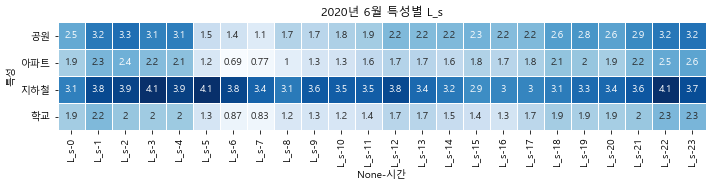

In [66]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월 특성별 L_s')
plt.tight_layout()
plt.show()

In [67]:
data_pivot_L_s_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['L_s'], aggfunc = 'std')
data_pivot_L_s_std.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   3.302725  3.696498  4.133214  3.725097  4.409122  3.149877  2.368445   
아파트  2.691314  2.867378  2.984763  2.796522  2.984552  2.358354  1.444250   
지하철  4.183201  5.003328  5.052465  6.845218  5.731044  7.183653  6.079461   
학교   2.715263  2.922885  2.773086  2.663739  3.003161  2.230351  1.708123   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   2.148061  3.168877  2.029195  2.214404  2.432598  2.873815  2.575517   
아파트  1.538870  1.710673  2.068260  1.932817  2.180913  2.218125  2.141948   
지하철  5.903443  4.308315  5.723491  5.515193  5.329424  6.511857  4.358157   
학교   1.557215  2.104178  2.154878  2.060642  2.069784  2.281714  2.455577   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   2.556302  2.983067  2.453448  2.422926  3.090504  2.960933  2.934055   
아파트  1.779028  2.218163  2.093048  2.051236  2.396462  2.212440  2.189557   
지하철  4.340519  3.783234  4.161069  4.623987  5.065952  5.351907  5.876313   
학교   2.106027  1.773551  1.625482  2.372712  2.661957  2.473292  2.691091   

                                   
시간         21        22        23  
특성                                 
공원   3.176325  3.513998  3.563577  
아파트  2.577563  2.794083  2.931659  
지하철  5.610499  6.157083  4.955277  
학교   2.557641  2.928095  2.977125

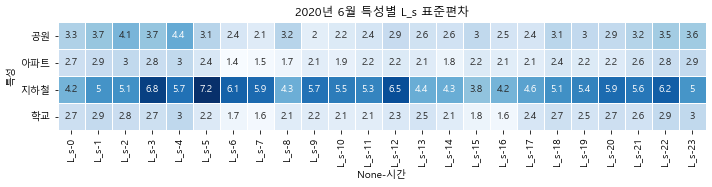

In [68]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월 특성별 L_s 표준편차')
plt.tight_layout()
plt.show()

In [69]:
data_pivot_W_s = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['W_s'])
data_pivot_W_s.head()

W_s                                                          \
시간          0          1          2          3           4          5    
특성                                                                       
공원    9.403674  20.279697  34.403188  50.699579  100.433069  38.753951   
아파트   7.306960  13.584221  29.851865  30.574245   48.696064  28.070540   
지하철   8.456520  15.501321  24.989000  36.533134   63.066754  66.700933   
학교   13.175325  19.800582  28.568637  41.084930   40.336049  40.678833   

                                                                             \
시간          6          7         8         9         10        11        12   
특성                                                                            
공원   22.811510   5.461328  4.989899  7.862133  8.384443  8.237655  8.003719   
아파트  11.253053   4.946024  4.151524  6.746929  7.860755  8.859760  7.439327   
지하철  30.840810  10.715386  5.236505  8.033757  9.291726  8.332396  7.267719   
학교   15.704401   8.228262  5.190186  6.740374  7.076148  7.697153  7.457864   

                                                                           \
시간         13        14        15        16        17        18        19   
특성                                                                          
공원   8.108079  7.354739  6.290671  4.597655  3.529924  3.140023  3.534766   
아파트  7.199229  6.142160  5.921912  4.769875  3.785746  2.945603  2.940374   
지하철  6.238099  5.851170  4.881550  3.945104  2.921071  2.228454  2.918034   
학교   6.707154  5.643630  5.315108  3.956658  3.674557  3.377043  3.604341   

                                             
시간         20        21        22        23  
특성                                           
공원   3.659409  4.679590  5.713222  8.843798  
아파트  2.928133  3.700657  4.921726  7.580050  
지하철  3.456314  4.211488  5.811584  7.981913  
학교   3.861555  4.635399  5.969889  9.488409

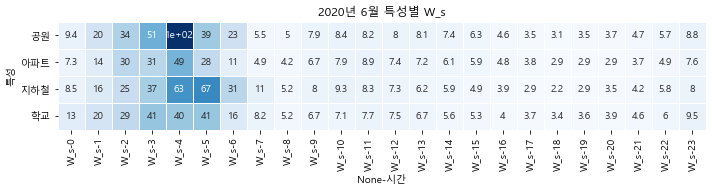

In [70]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월 특성별 W_s')
plt.tight_layout()
plt.show()

In [71]:
data_pivot_W_s_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['W_s'], aggfunc = 'std')
data_pivot_W_s_std.head()

W_s                                                           \
시간          0          1          2          3           4           5    
특성                                                                        
공원    8.612459  24.331938  49.674822  66.077231  314.702962   71.871296   
아파트   9.592421  20.682427  74.948027  40.619759   77.360453   65.513342   
지하철  10.639286  27.555945  41.607219  59.931691  106.911525  124.860699   
학교   26.532987  29.095044  40.256861  62.329115   55.658640   73.410120   

                                                                              \
시간          6          7         8         9         10         11        12   
특성                                                                             
공원   50.168115   6.687175  4.934524  6.868439  5.951817   6.135838  6.353804   
아파트  22.654022   9.747728  5.204275  7.273938  8.427558  11.602337  7.457318   
지하철  61.503813  13.879684  4.904586  7.023132  7.113258   5.893089  5.148247   
학교   25.083914  27.209236  7.614719  6.795400  6.294166   8.088367  7.228190   

                                                                           \
시간         13        14        15        16        17        18        19   
특성                                                                          
공원   6.383957  5.694853  4.204023  3.145147  2.205727  2.119333  2.142824   
아파트  6.972720  5.050854  6.005156  4.517266  3.275215  2.392981  2.204866   
지하철  4.035636  3.991362  3.364740  2.684584  2.076696  1.489764  2.052106   
학교   5.337883  4.083688  4.583342  2.790891  2.973689  2.918221  2.854580   

                                              
시간         20        21        22         23  
특성                                            
공원   2.707991  3.449569  4.018764   6.622890  
아파트  2.072782  2.680188  3.959272   7.518930  
지하철  2.448882  3.739150  6.622765  11.639975  
학교   3.151579  3.743770  5.292250  12.105766

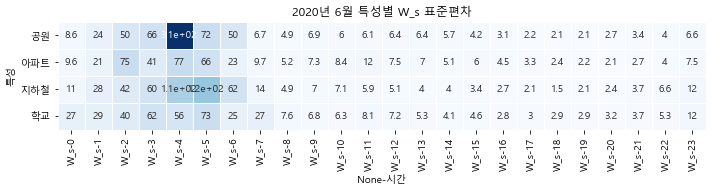

In [72]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 6월 특성별 W_s 표준편차')
plt.tight_layout()
plt.show()